In [20]:
from sklearn_som.som import SOM
from sklearn import datasets
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [21]:
iris = datasets.load_iris()
iris_data = iris.data[:, :2]
iris_label = iris.target

In [22]:
print(iris_data.shape)
print(iris_label.shape)

(150, 2)
(150,)


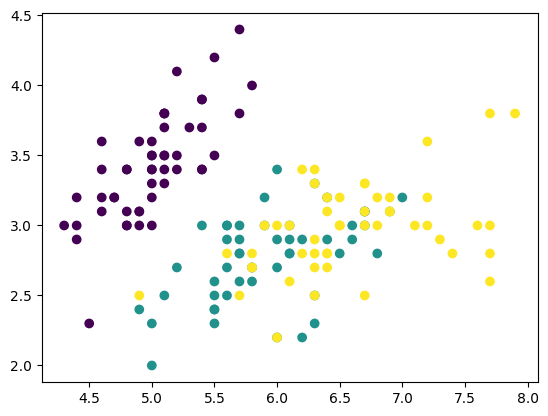

In [23]:
plt.scatter(iris_data[:,0],iris_data[:,1],c=iris_label)

In [24]:
iris_som = SOM(m=3, n=1, dim=2)
iris_som.fit(iris_data)

In [25]:
predictions = iris_som.predict(iris_data)

In [26]:
predictions.shape

(150,)

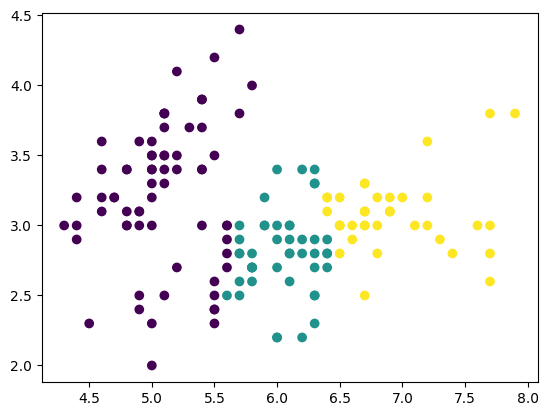

In [27]:
plt.scatter(iris_data[:,0],iris_data[:,1],c=predictions)

# Andiamo a utilizzare questo algoritmo di som sul nostro dataset

In [28]:
nome_file='Friday-02-03-2018_TrafficForML_CICFlowMeter'

with open('pickle/'+nome_file+'/scaled_document.pickle', 'rb') as handle:

    df = pickle.load(handle)

In [29]:
feature_1 = 'Init Bwd Win Byts'
feature_2 = 'Fwd Pkts/s'


df = df[[feature_1, feature_2,'Label']]

In [30]:
df_prova = df.groupby(['Label'])['Label'].count()


df_prova=df_prova.to_frame()
print(df_prova)
df_prova.set_index('Label')
df_prova=df_prova.rename(columns={'Label':'Count'})

        Label
Label        
0      758334
1      286191


In [31]:
bot = df[df.Label == 1]
benign = df[df.Label == 0]

print("Benign: ", len(benign), "Bot: ", len(bot))

Benign:  758334 Bot:  286191


In [32]:
#bilanciamento del dataset
balanced_d = pd.concat([bot, benign.sample(len(bot))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(572382, 3)

In [39]:
print(x.shape)
print(type(x.values))

(572382, 2)
<class 'numpy.ndarray'>


In [41]:
# Eseguiamo il clustering

n_clusters = len(balanced_d['Label'].unique())  # numero di cluster

y_pred = SOM(m=10, n=10, dim=2)

y_pred.fit(x.values)

predictions = y_pred.predict(x.values)

# Associazione del cluster i-esimo con la classe i-esima
cluster_class_mapping = {}
'''for i in range(n_clusters):
    cluster_samples = x[y_pred == i]
    cluster_classes = y[y_pred == i]
    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)
    dominant_class = unique_classes[np.argmax(class_counts)]
    cluster_class_mapping[i] = dominant_class'''

'for i in range(n_clusters):\n    cluster_samples = x[y_pred == i]\n    cluster_classes = y[y_pred == i]\n    unique_classes, class_counts = np.unique(cluster_classes, return_counts=True)\n    dominant_class = unique_classes[np.argmax(class_counts)]\n    cluster_class_mapping[i] = dominant_class'

In [ ]:
difference = pd.DataFrame(data=[],columns=['num_cluster','num_class'])

In [ ]:
# Plot dei risultati
plt.scatter(x[feature_1], x[feature_2], c=y['Label'])
plt.title("Optimal Number of Clusters")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
axs.scatter(x[feature_1], x[feature_2], c=y_pred)
axs.set_title("Mixture of Gaussian Blobs")

# Stampiamo l'associazione del cluster con la classe
for i in range(n_clusters):
    if(i != cluster_class_mapping[i]):

        new_row = pd.Series({'num_cluster': i, 'num_class': cluster_class_mapping[i]})
        difference = pd.concat([difference,new_row.to_frame().T],ignore_index=True)
        
    axs.text(
        np.mean(x[feature_1][y_pred == i]), np.mean(x[feature_2][y_pred == i]),
        f"Cluster {i}: Class {cluster_class_mapping[i]}",
        fontsize=12, fontweight='bold', color='red', ha='center', va='center'
    )

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()